In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv("C:/Users/scet2/OneDrive/Desktop/karthik.csv")

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [78]:
x=df.drop(columns='target')
y=df['target']

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [82]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)
x_train
y_train

4    0
8    0
6    0
3    1
0    1
5    0
Name: target, dtype: int64

In [84]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)



LogisticRegression()

In [88]:
y_pred = classifier.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 1]], dtype=int64)

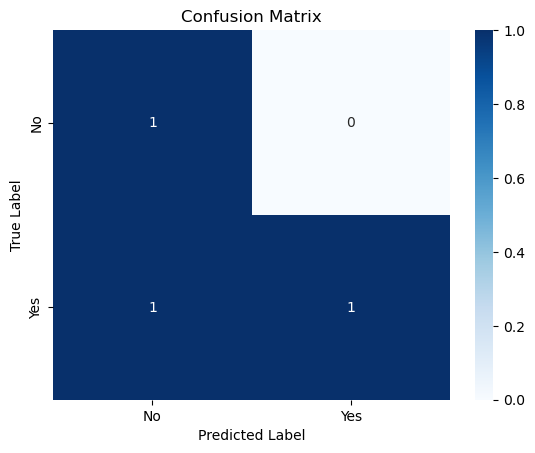

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cm is your confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,classification_report
accuracy =accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy*100:.2f}%")

Accuracy:66.67%


In [104]:
from sklearn.metrics import classification_report

classreport = classification_report(y_test, y_pred)
print(classreport)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [106]:
print(f"\n classification Report :\n",classreport)


 classification Report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



ROC AUC: 0.5


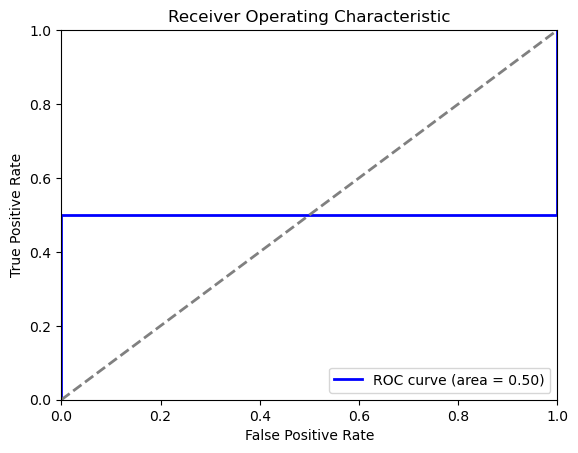

In [110]:
from sklearn.metrics import roc_curve, auc

# Correct the typo in classifier
y_prob = classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc}")

# Optionally, plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
